# Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# 본인 구글 드라이브에 업로드한 heart.csv 파일의 주소를 넣어주세요!
heart = pd.read_csv('heart.csv')

# About Dataset
Age : Age of the patient

Sex : Sex of the patient

cp : Chest Pain type chest pain type  
 - Value 1: typical angina  
 - Value 2: atypical angina  
 - Value 3: non-anginal pain  
 - Value 4: asymptomatic  

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results  
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh : maximum heart rate achieved

exng: exercise induced angina (1 = yes; 0 = no)

oldpeak : previous peak

slp : slope

caa: number of major vessels (0-3)

thall : Thal rate

output : 0= less chance of heart attack 1= more chance of heart attack

# 1. EDA

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# data shape
heart.shape

(303, 14)

In [6]:
# checking number of unique value
unique_heart = pd.DataFrame(index = heart.columns, columns = ['unique count'])

for i in list(heart.columns):
  unique_heart.loc[i,'unique count'] = heart[i].value_counts().shape[0]

unique_heart

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


## Seperating the columns by categorical and numerical

In [7]:
# Seperating the columns by categorical and numerical
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [8]:
# numerical statistics
heart[num_cols].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [9]:
# missing value
heart.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Visualization

### categorical plotting

In [10]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [11]:
type(cat_cols)

list

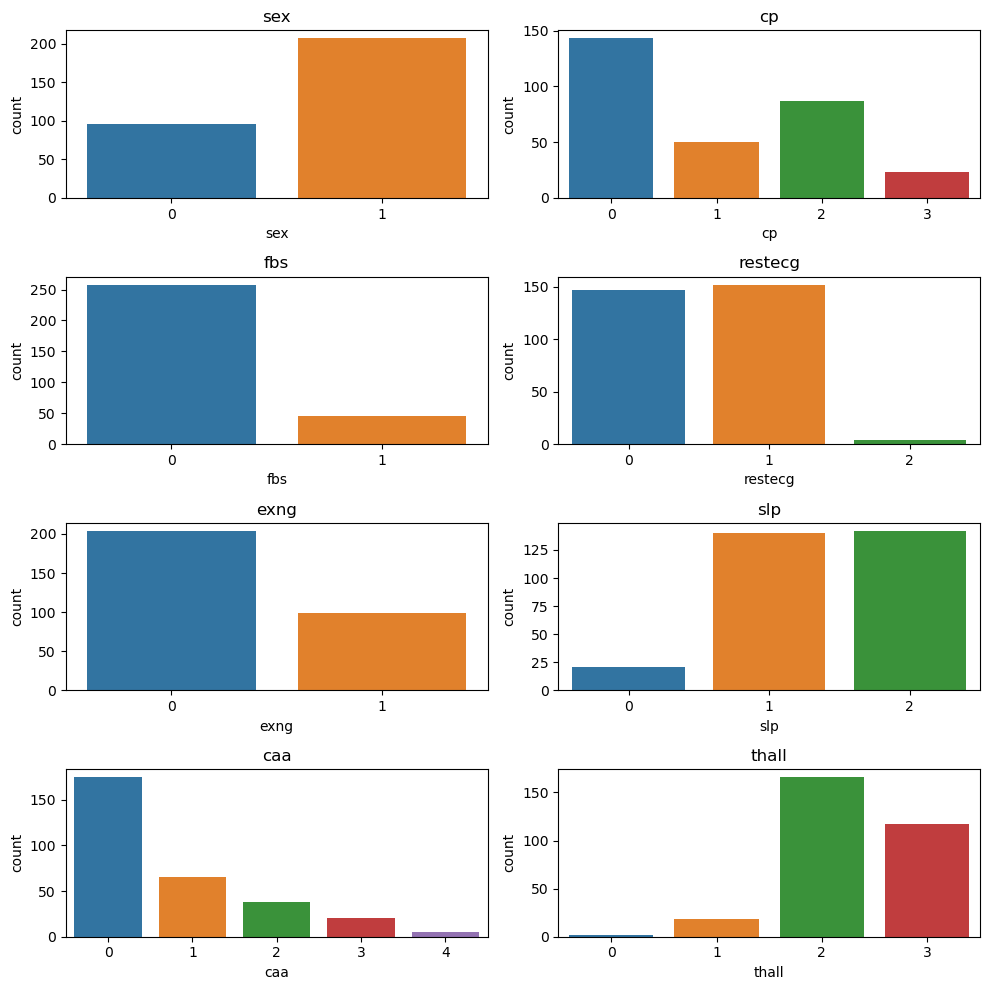

In [12]:
fig, axs = plt.subplots(4, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
  sns.countplot(data = heart, x = cat_cols[i], ax = ax)
  ax.set_title(f'{cat_cols[i]}')

plt.tight_layout()
plt.show()

### numerical plotting

In [13]:
num_cols

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

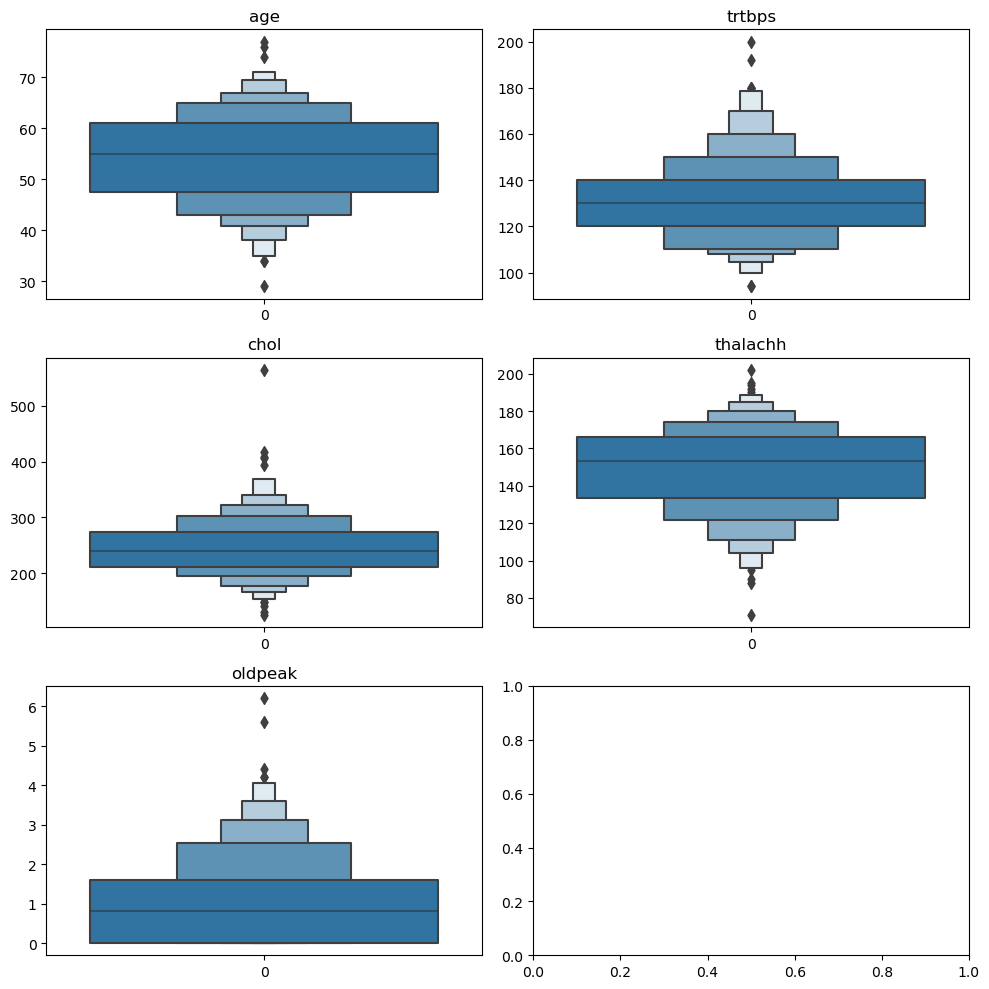

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
  if i == 5:
    break
  sns.boxenplot(heart[num_cols[i]], ax = ax)
  ax.set_title(f'{num_cols[i]}')


plt.tight_layout()
plt.show()

### target plotting

<Axes: xlabel='output', ylabel='count'>

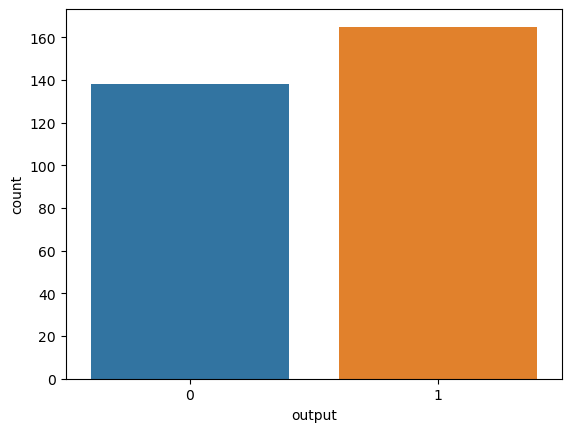

In [15]:
sns.countplot(data = heart,x = 'output')

## correlation matrix

<Axes: >

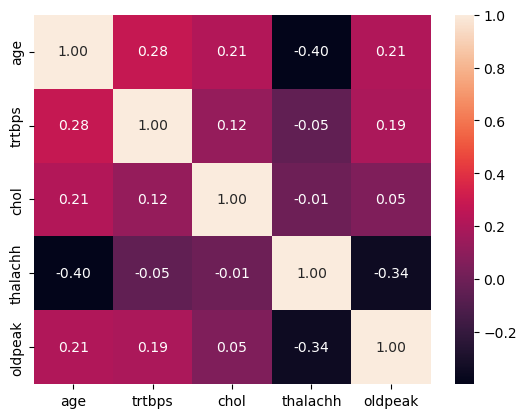

In [16]:
# numerical
heart_corr = heart[num_cols].corr()
sns.heatmap(heart_corr, fmt='.2f',annot = True)

<Axes: >

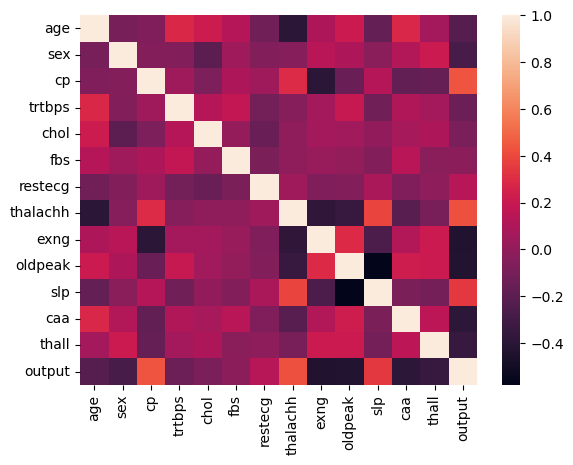

In [17]:
# all
heart_corr = heart.corr()
sns.heatmap(heart_corr, fmt='.2f',annot = False)

# preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
prep_heart = heart.copy()

# encoding categorical features
prep_heart = pd.get_dummies(prep_heart, columns = cat_cols, drop_first = True)

# scaling
scaler = StandardScaler()
prep_heart[num_cols] = scaler.fit_transform(prep_heart[num_cols])

# split X,y
X = prep_heart.drop(['output'], axis = 1)
y = prep_heart['output']

In [20]:
prep_heart #num col은 scaling, cate col은 dummies encoding.

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [21]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Training

## Logistic Regression

### Q1. 아래 시그모이드 함수를 구현하세요

$\sigma(z) = \frac{1}{1 + e^{-z}}$


In [22]:
# Sigmoid 함수 정의
import matplotlib.pyplot as plt
def sigmoid(z):
    return 1/(1+np.exp(-z))

x= np.arange(-10,10,0.1) # -10부터 10까지 0.1 간격으로 숫자 배열반환.
print(type(x)) ,print(x)

<class 'numpy.ndarray'>
[-1.00000000e+01 -9.90000000e+00 -9.80000000e+00 -9.70000000e+00
 -9.60000000e+00 -9.50000000e+00 -9.40000000e+00 -9.30000000e+00
 -9.20000000e+00 -9.10000000e+00 -9.00000000e+00 -8.90000000e+00
 -8.80000000e+00 -8.70000000e+00 -8.60000000e+00 -8.50000000e+00
 -8.40000000e+00 -8.30000000e+00 -8.20000000e+00 -8.10000000e+00
 -8.00000000e+00 -7.90000000e+00 -7.80000000e+00 -7.70000000e+00
 -7.60000000e+00 -7.50000000e+00 -7.40000000e+00 -7.30000000e+00
 -7.20000000e+00 -7.10000000e+00 -7.00000000e+00 -6.90000000e+00
 -6.80000000e+00 -6.70000000e+00 -6.60000000e+00 -6.50000000e+00
 -6.40000000e+00 -6.30000000e+00 -6.20000000e+00 -6.10000000e+00
 -6.00000000e+00 -5.90000000e+00 -5.80000000e+00 -5.70000000e+00
 -5.60000000e+00 -5.50000000e+00 -5.40000000e+00 -5.30000000e+00
 -5.20000000e+00 -5.10000000e+00 -5.00000000e+00 -4.90000000e+00
 -4.80000000e+00 -4.70000000e+00 -4.60000000e+00 -4.50000000e+00
 -4.40000000e+00 -4.30000000e+00 -4.20000000e+00 -4.10000000e+00
 

(None, None)

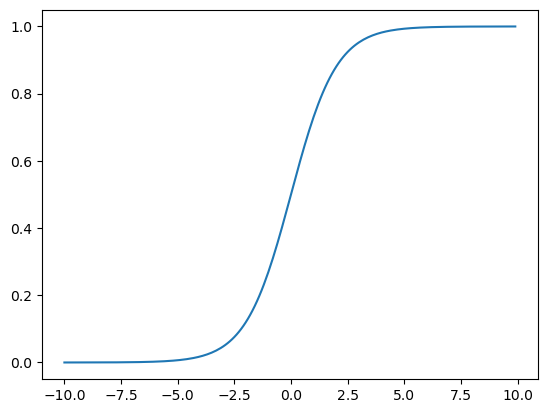

In [23]:
plt.plot(x,sigmoid(x))
plt.show()

### Q.2 Cross Entropy를 구현하세요.

In [24]:
# Binary Cross Entropy 정의
# 이진 교차 엔트로피 손실
def BCE(y,y_pred):
    delta =1e-7 # log(0) 방지용.
    N = len(y)
    Loss = -1/N * np.sum(y*np.log(y_pred+delta)+(1-y)*np.log(1-y_pred+delta))
    return Loss

In [25]:
y_pred = np.array([0.6,0.1,0.5,0.8,0.7,0.45])
y = np.array([1,0,0,1,1,0])
BCE(y,y_pred)

0.4144979814232162

### Logistic Regression Model

In [26]:
# Logistic Regression model
def logistic_regression(X, y, num_iterations, learning_rate):
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Loss function
        cost = BCE(y,y_pred)
        cost_history.append(cost)

        gradient = np.dot(X.T, (y_pred - y)) / len(y)
        weights -= learning_rate * gradient

    return weights, cost_history

In [27]:
num_iterations = 10000
learning_rate = 0.01

weights, cost_history = logistic_regression(X_train, y_train, num_iterations, learning_rate)

print('Weights:', weights)
print('Final Cost:', cost_history[-1])

Weights: [ 0.05293664 -0.26835092 -0.07852607  0.33638329 -0.65871575 -0.91677142
  0.49887133  1.43812678  1.09054531  0.34738847  0.47143751  0.02420021
 -0.85299467 -0.13433424  0.7364544  -1.59062778 -1.42950524 -0.73335733
  0.25806157  0.26849969  0.98642513 -0.53499428]
Final Cost: 0.32138666504065355


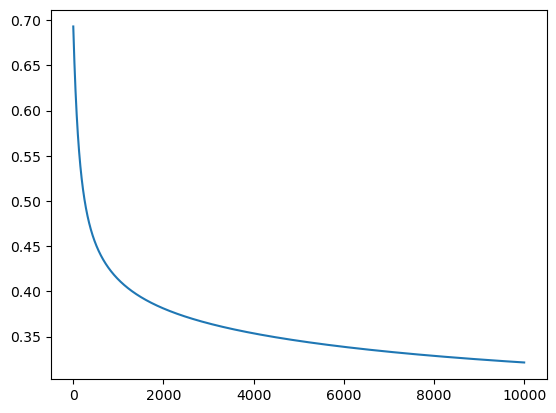

In [28]:
plt.plot(cost_history)

In [29]:
# Predict test data
z = np.dot(X_test, weights)
y_pred = np.round(sigmoid(z))

In [30]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve

In [31]:
accuracy_score(y_test, y_pred)

0.8852459016393442

## KNN classification

### Q3. 거리 계산 함수에 대해 구현해보세요

In [32]:
def euclidean_distance(x1, x2):
    dist = 0
    for i in range(len(x1)):
        dist += (x1[i]-x2[i])**2
    return dist ** 0.5

def manhattan_distance(x1, x2):
    mandist =0
    for i in range(len(x1)):
        mandist += abs(x1[i]-x2[i])
    return mandist

In [33]:
print(euclidean_distance(x1=[3,5],x2=[6,9]))
print(manhattan_distance(x1=[3,5],x2=[6,9]))

5.0
7


In [34]:
# KNN 분류기 구현
def KNN(X_train, y_train, X_test, k):
    y_pred = []

    for test_sample in X_test.values:
        distances = [euclidean_distance(test_sample, train_sample) for train_sample in X_train.values]
        sorted_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train.iloc[sorted_indices]
        unique_labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(label_counts)]
        y_pred.append(predicted_label)

    return np.array(y_pred)

In [35]:
k = 5
y_pred = KNN(X_train, y_train, X_test, k)

In [36]:
accuracy_score(y_test, y_pred)

0.8524590163934426

# Q4. sklearn의 Decision Tree를 사용해서 classification을 진행해보세요!

In [37]:
from sklearn.tree import DecisionTreeClassifier
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
DTC = DecisionTreeClassifier(random_state = 42)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred = DTC.predict(X_test)
print('accuracy : ', accuracy_score(y_test,y_pred))

accuracy :  0.7213114754098361


## Q5. 모델의 학습 결과에 대한 ROC curve를 그리고 AUC 값을 출력해보세요!

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

In [40]:
accuracy_score(y_test, y_pred)

0.7213114754098361

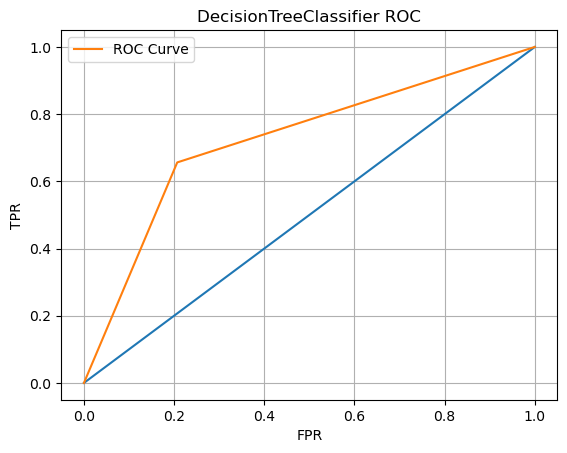

AUC : 0.724676724137931


In [41]:
# calculating probability 예측의 불확실성 추정.
#y_pred = DTC.predict(X_test)
y_pred_prob = DTC.predict_proba(X_test)[:,1]
# AUC 
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label = 'ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DecisionTreeClassifier ROC')
plt.grid()
plt.legend(loc='upper left')
plt.show()

# ROC curve
print('AUC : {}'.format(roc_auc_score(y_test,y_pred_prob)))

## Q6. Plot_tree를 이용해서 decision tree의 결과를 확인해 봅시다.

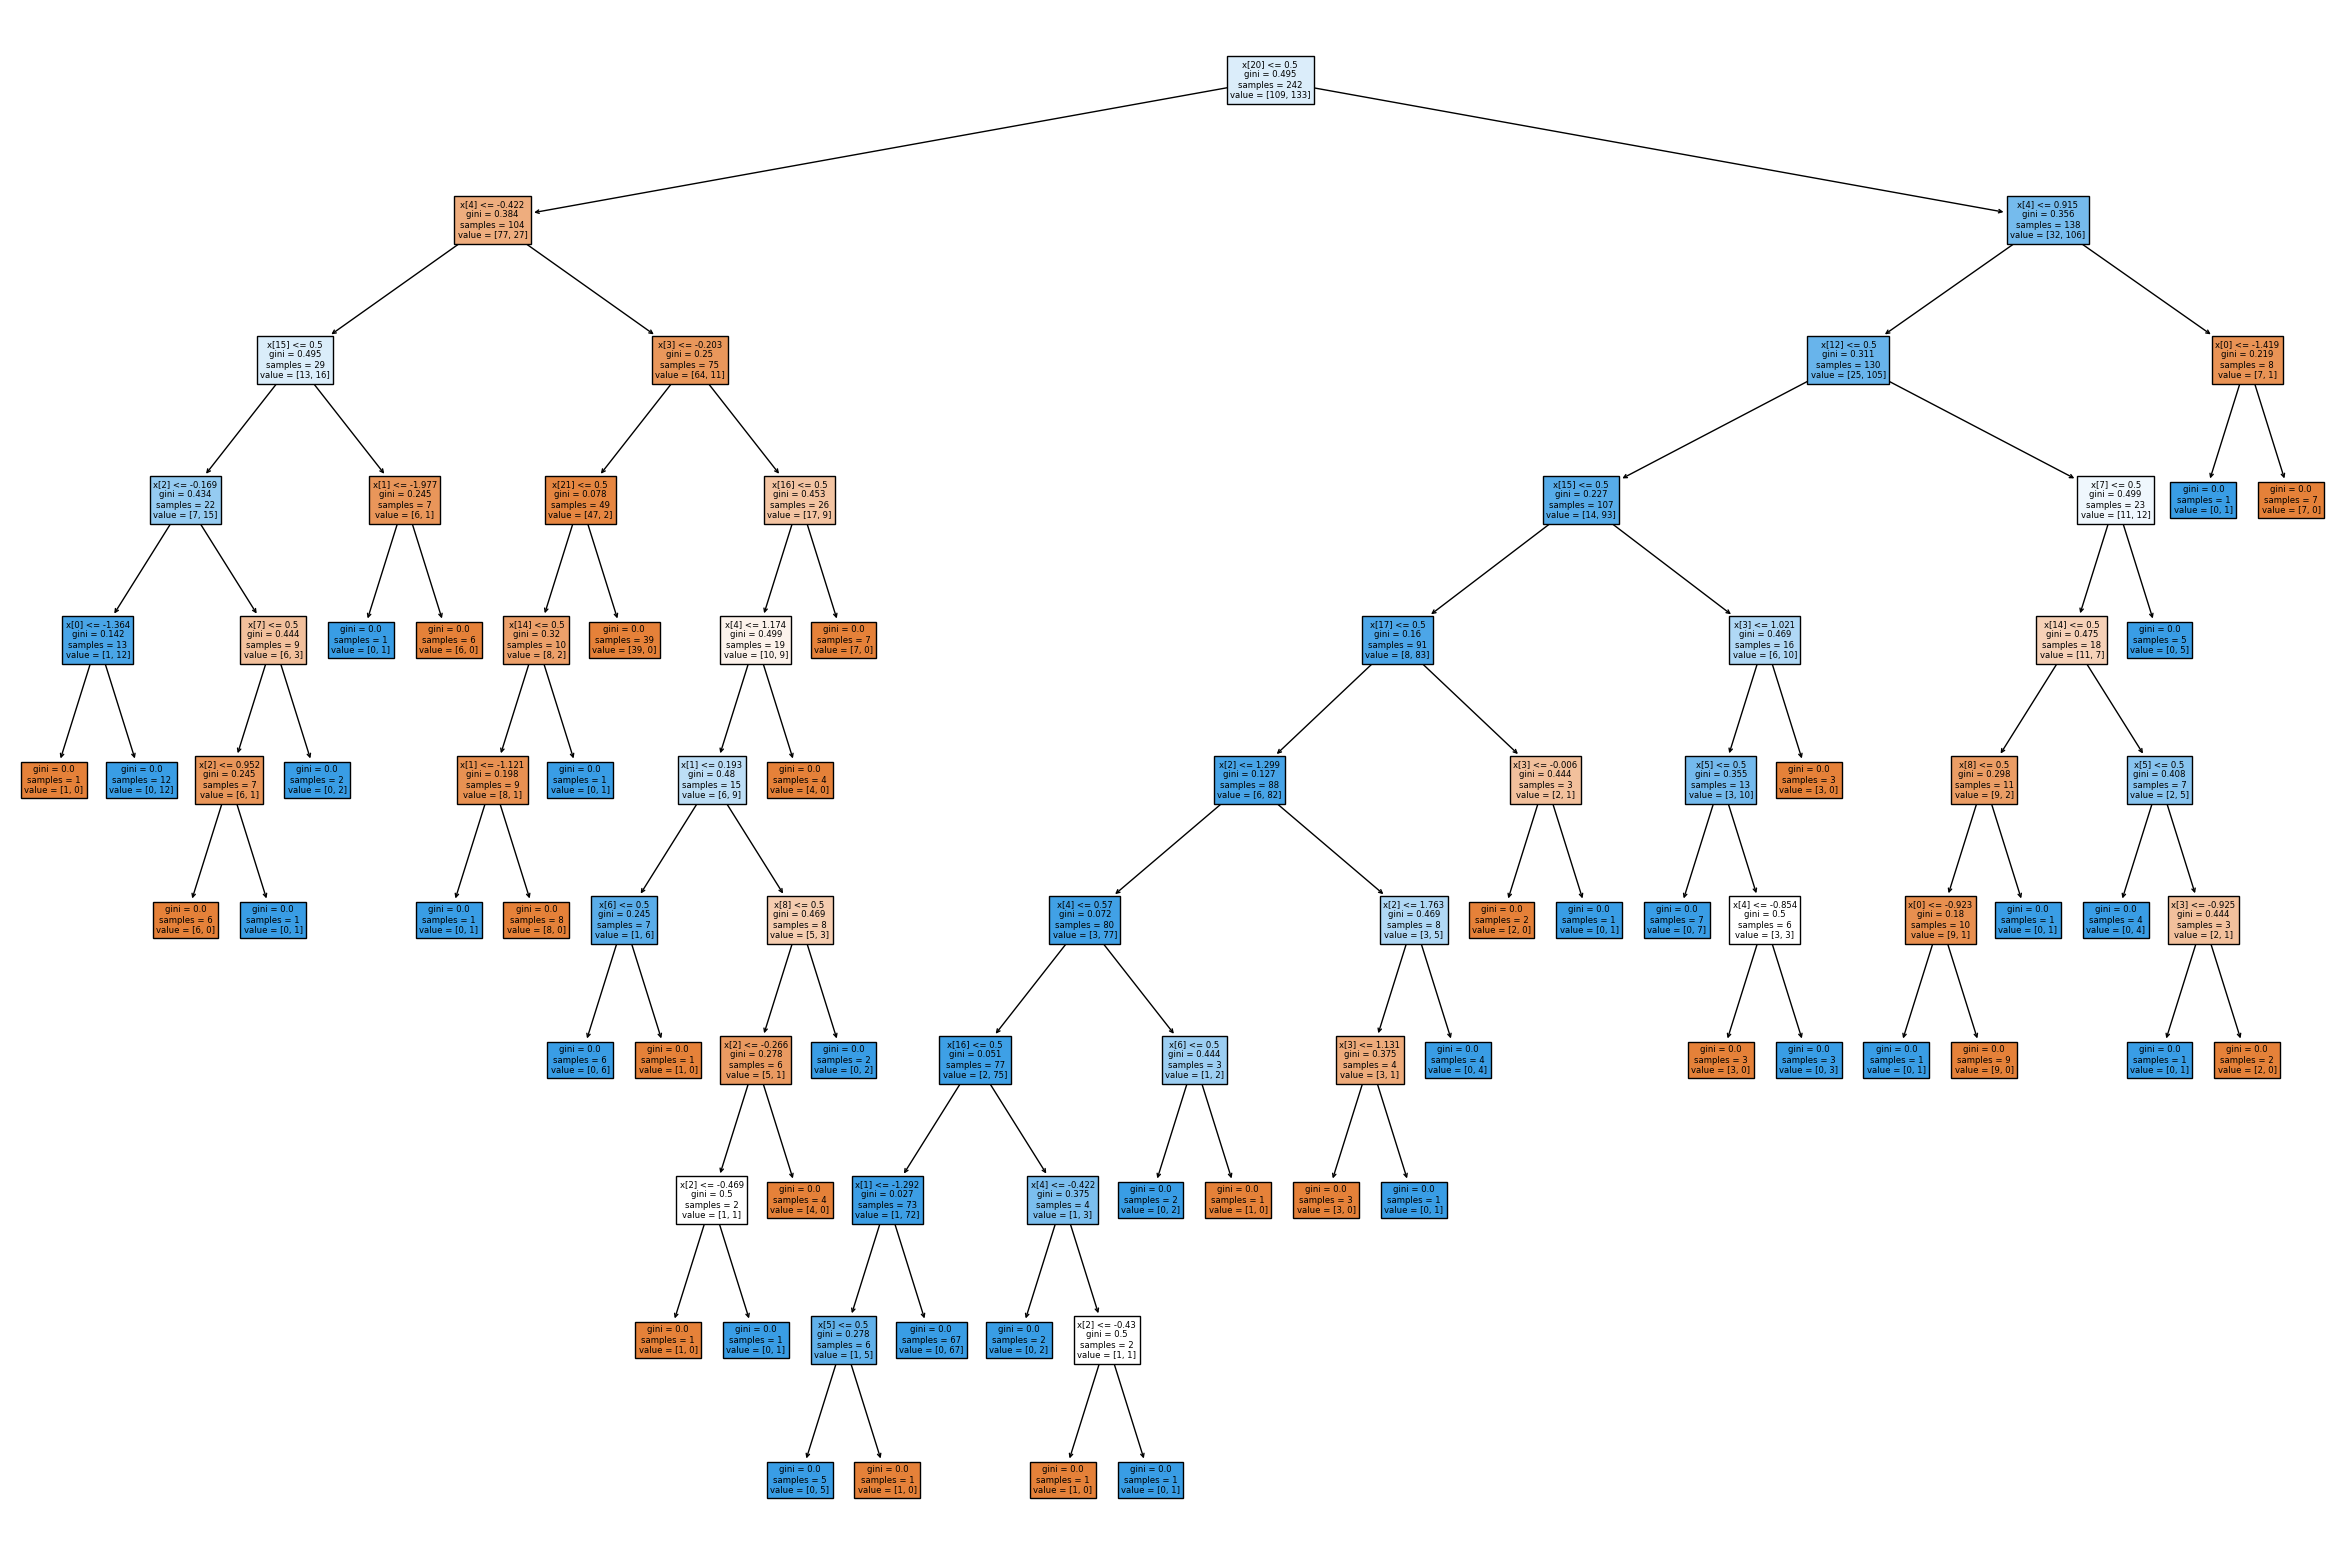

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize = (30,20))
plot_tree(DTC, filled = True)
plt.show()